In [115]:
import pandas as pd
from pandasql import sqldf
sql = lambda q: sqldf(q, globals())
import plotly.express as px
import matplotlib.pyplot as plt

In [116]:
jobs = pd.read_csv('data/employment_projection.csv')

In [117]:
jobs.head()

,Occupation Title,Occupation Code,Employment 2019,Employment 2029,"Employment Change, 2019-2029","Employment Percent Change, 2019-2029","Occupational Openings, 2019-2029 Annual Average",Median Annual Wage 2019,Typical Entry-Level Education,Education Code,Work Experience in a Related Occupation,Workex Code,Typical on-the-job Training,trCode
0,Accountants and auditors * Account Auditor*...,13-2011,1436.1,1497.9,61.7,4.3,125.7,71550,Bachelor's degree,3,None,4,None,6
1,Actuaries * Actuarial Associate* Actuarial ...,15-2011,27.7,32.6,4.9,17.6,2.0,108350,Bachelor's degree,3,None,4,Long-term on-the-job training,3
2,Acupuncturists and healthcare diagnosing or tr...,29-1298,49.6,49.4,-0.1,-0.3,2.3,75640,Master's degree,2,None,4,None,6
3,Adhesive bonding machine operators and tenders...,51-9191,14.0,13.7,-0.2,-1.8,1.4,34340,High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4
4,"Administrative law judges, adjudicators, and h...",23-1021,15.4,15.4,0.0,0.3,0.7,97870,Doctoral or professional degree,1,5 years or more,1,Short-term on-the-job training,5


In [118]:
query = """
SELECT j.'Typical Entry-Level Education', COUNT(*) AS mode
FROM jobs j 
GROUP BY j.'Typical Entry-Level Education'
"""

education = sql(query)
education

,Typical Entry-Level Education,mode
0,Associate's degree,46
1,Bachelor's degree,169
2,Doctoral or professional degree,63
3,High school diploma or equivalent,322
4,Master's degree,36
5,No formal educational credential,99
6,Postsecondary nondegree award,45
7,"Some college, no degree",5


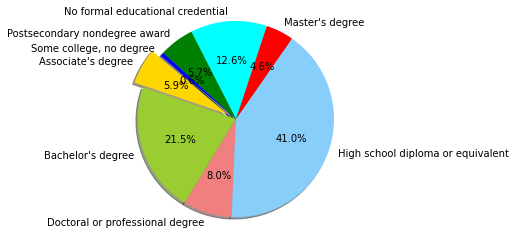

In [121]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','cyan','green','blue']
explode = (0.1, 0, 0, 0,0,0,0,0)  # explode 1st slice

# Plot
plt.pie(education['mode'], explode=explode, labels=education['Typical Entry-Level Education'], colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()